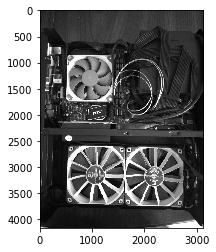

In [74]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'data/P_20180805_090155.jpg'
bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32")
plt.imshow(gray_img, cmap="gray")
plt.show()

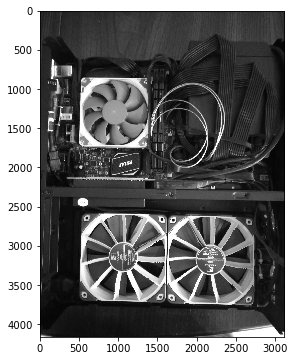

In [75]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'data/P_20180805_090155.jpg'
img_rgb = cv2.imread(img_path)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.astype("float32") / 255
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap="gray")
plt.show()

In [93]:
import numpy as np

# filter_vals = np.array([[-1, -1, 1, 1, 1],
#                        [-1, 1, 1, -1, 1],
#                        [-1, 1, 1, -1, 1],
#                        [-1, 1, 1, -1, 1],
#                        [-1, -1, 1, -1, 1]])

filter_vals = np.array([[-1, -1, 0, 1, 1],
                       [-1, 0, 0, 0, 1],
                       [-1, 0, 0, 0, 1],
                       [-1, 0, 0, 0, 1],
                       [-1, -1, 1, 0, 1]])

filter_1 = filter_vals
filter_2 = filter_vals.T
filter_3 = -filter_vals
filter_4 = -filter_2

filters = np.array([filter_1, filter_2, filter_3, filter_4])
print(filter_vals.shape)

(5, 5)


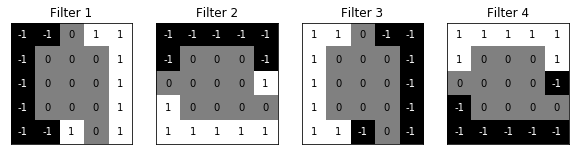

In [94]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self, weight):
        super().__init__()
        k_height, k_width = weight.shape[2:]
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv1 = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv1.weight = torch.nn.Parameter(weight)
    
    def forward(self, x):
        x = self.conv1(x)
        activated_x = F.relu(x)
        
        return x, activated_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Network(weight)

print(weight)
print(model)

tensor([[[[-1., -1.,  0.,  1.,  1.],
          [-1.,  0.,  0.,  0.,  1.],
          [-1.,  0.,  0.,  0.,  1.],
          [-1.,  0.,  0.,  0.,  1.],
          [-1., -1.,  1.,  0.,  1.]]],


        [[[-1., -1., -1., -1., -1.],
          [-1.,  0.,  0.,  0., -1.],
          [ 0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  0., -1., -1.],
          [ 1.,  0.,  0.,  0., -1.],
          [ 1.,  0.,  0.,  0., -1.],
          [ 1.,  0.,  0.,  0., -1.],
          [ 1.,  1., -1.,  0., -1.]]],


        [[[ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  0.,  0.,  0.,  1.],
          [ 0.,  0.,  0.,  0., -1.],
          [-1.,  0.,  0.,  0.,  0.],
          [-1., -1., -1., -1., -1.]]]])
Network(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), bias=False)
)


In [103]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

torch.Size([1, 1, 4160, 3120])


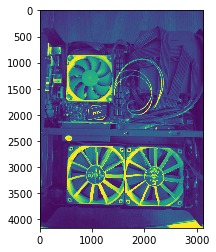

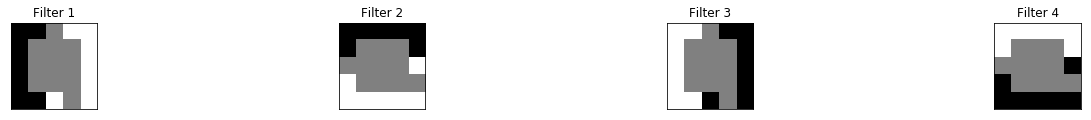

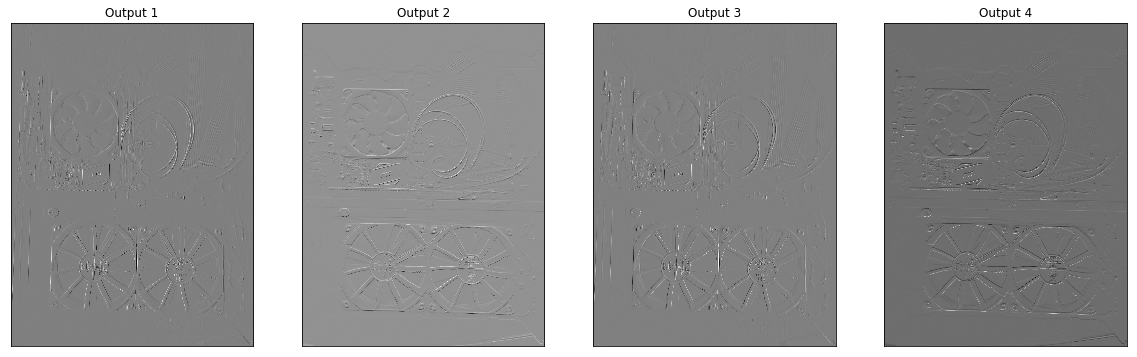

In [105]:
plt.imshow(img_gray)

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
gray_img_tensor = torch.from_numpy(img_gray).unsqueeze(0).unsqueeze(1).type(torch.FloatTensor)
print(gray_img_tensor.shape)

conv_layer, activated_layer = model(gray_img_tensor)

viz_layer(conv_layer)